## Assignment 4 - Sales - MORGAN KAISER

You work for Giant Eagle and you have collected sales data for 8523 products across different Giant Eagles in different cities.  Your **goal is to predict the sales of each product**. Below are the variables you have in your dataset.

* 'Product_Idenfier': Unique product ID
* 'Product_Weight': Weight of product
* 'Product_Fat_Content': Whether the product is low fat or not
* 'Product_Visibility': The % of total display area of all products in a store allocated to the parcular product
* 'Product_Type': The category to which the product belongs
* 'Product_MRP': Maximum Retail Price (list price) of the product
* 'Outlet_Idenfier': Unique store ID
* 'Outlet_Establishment_Year': The year in which store was established
* 'Outlet_Size': The size of the store in terms of ground area
* 'Outlet_Location_Type': The type of city in which the store is located
* 'Outlet_Type': Whether the outlet is just a grocery store or some sort of supermarket
* 'Product_Outlet_Sales': Sales of the product in the particular store. **This is the outcome variable to be predicted.**

You want to run your model 1) with all the features and 2) with the lowest possible number of features that still explains (99% to 100%) of variance.

Do not drop any variables other than Product Identifier.

At the end of your code, compare the performance the two models you created and how you determined the number of features to keep in the second model.

***
### Step 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Sales.csv')
df.head(10)

,Product_Identifier,Product_Weight,Product_Fat_Content,Product_Visibility,Product_Type,Product_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Product_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
# check out the numerical vars
df.describe()

,Product_Weight,Product_Visibility,Product_MRP,Outlet_Establishment_Year,Product_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations

> 75% of Giant Eagle's products weigh 8.7 (oz?) or more

> 50% of Giant Eagle's products have a list price of $143 or more

> 25% of Giant Eagle's outlets were built in 2004 to 2009

*Different scale -> need to scale our data before passing through model*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Product_Identifier           8523 non-null object
Product_Weight               7060 non-null float64
Product_Fat_Content          8523 non-null object
Product_Visibility           8523 non-null float64
Product_Type                 8523 non-null object
Product_MRP                  8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Product_Outlet_Sales         8523 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


> Product_Weight has null values (7060 total, missing 1463 rows)

> Outlet_Size has null values (6113 total, missing 2140 rows)

> Product_Identifier will be dropped

> 5 categorical columns will need to be converted using dummy variables (Product_Fat_Content, Product_Type, Outlet_Size, Outlet_Location_Type, and Outlet_Type)

***
### Step 2: Data Cleaning

In [5]:
# drop the unique product id

df = df.drop(['Product_Identifier'], axis=1)
df.head(10)

,Product_Weight,Product_Fat_Content,Product_Visibility,Product_Type,Product_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Product_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,NaN,Tier 2,Supermarket Type1,4710.5350


There are 2 ways to impute values for categorical variables: most common class and directly coding NaNs as "Unknown" or "Missing".

We're going to find the most common class for Outlet_Size by utilizing the value_counts function.

#### Impute missing values for Outlet_Size 

In [6]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

>Medium is the most common size of Giant Eagle outlets

> Medium = index 0, Small = index 1, High = index 2

In [7]:
# function called x saying to fill all null values with most common class
# because value_counts is in decreasing order, index[0] means we're grabbing the most common outlet size aka medium:)

df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.head(10)

,Product_Weight,Product_Fat_Content,Product_Visibility,Product_Type,Product_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Product_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,12.150,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,Medium,Tier 2,Supermarket Type1,4710.5350


#### Impute missing values for Product_Weight 
Product_Weight is a numerical feature, so we're going to impute the mean value. 

In [9]:
# function saying to fill NaN values in Product Weight column with the mean per Product Type
# aka group by product type. calculate mean product weight for each product type. fill in NaN values accordingly.

df["Product_Weight"] = df.groupby("Product_Type")["Product_Weight"].transform(lambda x: x.fillna(x.mean()))
df.head(10)

,Product_Weight,Product_Fat_Content,Product_Visibility,Product_Type,Product_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Product_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,12.150,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [10]:
# check to see if both imputations took care of the nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Product_Weight               8523 non-null float64
Product_Fat_Content          8523 non-null object
Product_Visibility           8523 non-null float64
Product_Type                 8523 non-null object
Product_MRP                  8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Product_Outlet_Sales         8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 665.9+ KB


When running get_dummies() function first time around, 'Product_Fat_Content' split into multiple redundant columns:

* 'Product_Fat_Content_LF', 'Product_Fat_Content_Low Fat','Product_Fat_Content_low fat'
* 'Product_Fat_Content_Regular', 'Product_Fat_Content_reg'

Let's fix this by making data consistent. Low Fat and Regular syntax only.

In [11]:
df['Product_Fat_Content'] = df['Product_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df['Product_Fat_Content'] = df['Product_Fat_Content'].replace(['reg'], 'Regular')

***
### Step 3: Convert Categorical Variables

In [12]:
# get dummies for all cat vars
df_2 = pd.get_dummies(data=df, columns=['Product_Fat_Content','Product_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
df_2.head()

,Product_Weight,Product_Visibility,Product_MRP,Outlet_Establishment_Year,Product_Outlet_Sales,Product_Fat_Content_Low Fat,Product_Fat_Content_Regular,Product_Type_Baking Goods,Product_Type_Breads,Product_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [13]:
df_2.columns

Index(['Product_Weight', 'Product_Visibility', 'Product_MRP',
       'Outlet_Establishment_Year', 'Product_Outlet_Sales',
       'Product_Fat_Content_Low Fat', 'Product_Fat_Content_Regular',
       'Product_Type_Baking Goods', 'Product_Type_Breads',
       'Product_Type_Breakfast', 'Product_Type_Canned', 'Product_Type_Dairy',
       'Product_Type_Frozen Foods', 'Product_Type_Fruits and Vegetables',
       'Product_Type_Hard Drinks', 'Product_Type_Health and Hygiene',
       'Product_Type_Household', 'Product_Type_Meat', 'Product_Type_Others',
       'Product_Type_Seafood', 'Product_Type_Snack Foods',
       'Product_Type_Soft Drinks', 'Product_Type_Starchy Foods',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      d

***
### Step 4: Split Dataset into Train and Test Sets

In [14]:
X = df_2.drop('Product_Outlet_Sales', axis=1)
X.head()

,Product_Weight,Product_Visibility,Product_MRP,Outlet_Establishment_Year,Product_Fat_Content_Low Fat,Product_Fat_Content_Regular,Product_Type_Baking Goods,Product_Type_Breads,Product_Type_Breakfast,Product_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [15]:
y = df_2['Product_Outlet_Sales']
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Product_Outlet_Sales, dtype: float64

In [16]:
y.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Product_Outlet_Sales, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

***
### Step 5: Scale Data Using StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***
### Step 6: Build Model 1 with all features

Because we're predicting sales, we need a regression model. I'm going to use the Random Forest Regressor model.

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=290, random_state=42)
rf_reg.fit(X_train, y_train) # Train the model
y_pred = rf_reg.predict(X_test)

***
### Step 7: Evaluate Model 1

*From Dr. Ozturk's feedback regarding evaluation of regression models:*

"**RMSE is a much better evaluator for the regression models**. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Where as R-squared is a relative measure of fit, **RMSE is an absolute measure of fit**."

*Additionally:* 

"RMSE can be interpreted as the standard deviation of the unexplained variance (aka residuals aka prediction errors), and it tells you how concentrated the data is around the line of best fit. **Lower values of RMSE indicate better fit**."

In [20]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2-score:", metrics.r2_score(y_pred, y_test))

Mean Absolute Error (MAE): 814.1294204975226
Mean Squared Error (MSE): 1304582.3621925672
Root Mean Squared Error (RMSE): 1142.1831561499089
R2-score: 0.306309718841299


***
### Step 8: Build Model 2 with lowest possible number of features that still explain (99% to 100%) of variance


*In other words, run PCA to identify which features to select then re-run Random Forest Regressor model with those features.* 

#### Step 8.1: Find number of principal components that explain 100% of variance using visualization

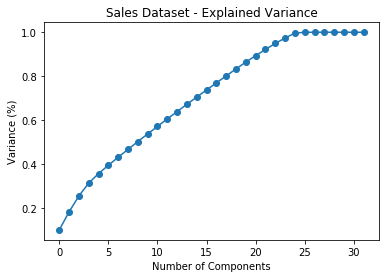

In [21]:
from sklearn.decomposition import PCA

# fitting the PCA algorithm with our X training data
pca = PCA().fit(X_train)

# plotting the cumulative summation of the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Sales Dataset - Explained Variance')
plt.show()

Plot Interpretation

> It seems that **100% of our variance is explained by using 24 principal components**, thus we are going to specify n_components=24 into PCA prior to running our Random Forest Regressor model a second time.

#### Step 8.2: Apply number of principal components chosen from Step 8.1 

In [22]:
# OPTIONAL WAY TO DO THIS WITHOUT VISUALIZING

# specify that 99% of the variance needs to be explained - leads us to 25 components, but above plot shows 24 might be better
#pca = PCA(.99)

In [23]:
pca = PCA(n_components=24)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10220558, 0.08218542, 0.0723662 , 0.05824256, 0.0432296 ,
       0.03762514, 0.036567  , 0.03577459, 0.03534053, 0.03446351,
       0.03429066, 0.03394435, 0.03348838, 0.03316353, 0.03267258,
       0.03236148, 0.03208626, 0.03187565, 0.03154293, 0.03121182,
       0.02917191, 0.02812995, 0.02734696, 0.02435451])

In [24]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

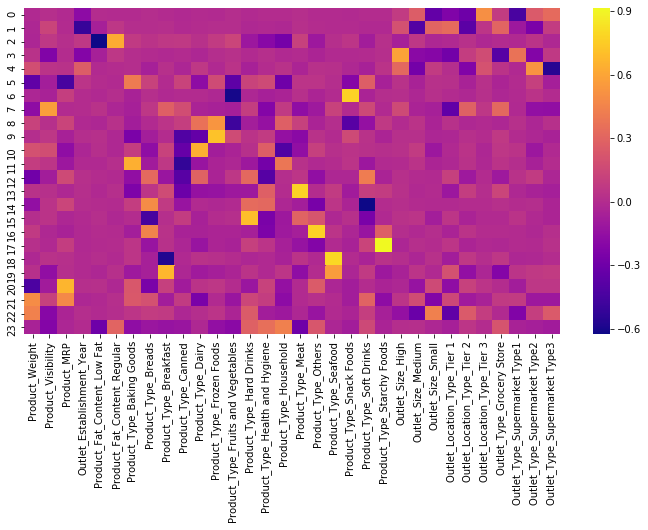

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

#### Step 8.3: Re-Run Random Forest Regressor Model

In [26]:
rf_reg = RandomForestRegressor(n_estimators=290, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

***
### Step 9: Evaluate Model 2

In [27]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2-score:", metrics.r2_score(y_pred, y_test))

Mean Absolute Error (MAE): 821.9153081848518
Mean Squared Error (MSE): 1291990.3822932018
Root Mean Squared Error (RMSE): 1136.6575483817462
R2-score: 0.260372256333786


***
### Step 10: Conclusion

> **24 principal components** were chosen because the visualization in Step 8.1 indicated 24 components explained 100% of the variance.

> Model 1 (RF Regressor) RMSE = 1142

> Model 2 (RF Regressor with PCA) RMSE = 1136

The lower the RMSE the better fit. Thus, running PCA before running the Random Forest Regressor model improved performance. More simply, **Model 2 is the better model for this particular dataset**. 